In [23]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

In [24]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# Load Network 15AB

In [25]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_1/models/B5R2_block5_15AB_1FC_3.h5' #model
model = load_model(model_dir)
height = width = model.input_shape[1]

In [26]:
# validation
import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image/'#แก้
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/Testdf.csv')#แก้
validation_dir = os.path.join(base_dir, 'test')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/Traindf.csv')#แก้
base_dir0 = '/media/tohn/SSD/Images/Image/'#แก้
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

In [27]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Testdf.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(1312, 22)
(1312, 22)
Normal:  (857, 22)
Abnormal:  (455, 22)


,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,...,originalImage,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,filename
0,111,111,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,https://irisprodseatraining.blob.core.windows....,86.0,133.0,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG
1,112,112,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,...,https://irisprodseatraining.blob.core.windows....,163.0,139.0,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG
2,113,113,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,https://irisprodseatraining.blob.core.windows....,127.0,135.0,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG
3,114,114,40,P5,P51,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-C,...,https://irisprodseatraining.blob.core.windows....,59.0,96.0,643.0,587.0,0.063462,0.107041,0.690385,0.653386,AB01 P5-1 C040.JPG
4,115,115,40,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,...,https://irisprodseatraining.blob.core.windows....,199.0,132.0,618.0,562.0,0.216374,0.146881,0.672515,0.625498,AB01 P3-1 C040.JPG


In [28]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Sub_class',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 1312 validated image filenames belonging to 15 classes.
{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


In [30]:
conf_mat = pd.crosstab(train_df['Views'],train_df['Sub_class'],rownames=['5-FP Class'],colnames=['15AB Class'])
conf_mat

15AB Class,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
5-FP Class,,,,,,,,,,,,,,,
FP-A,84,109,42,84,34,59,2,22,21,8,0,0,0,0,596
FP-B,130,103,24,37,60,5,51,57,48,23,2,0,0,0,1063
FP-C,81,61,19,38,4,0,21,45,40,12,96,43,60,0,1015
FP-D,0,0,0,19,0,0,0,0,0,0,0,0,34,245,482
FP-E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278


In [31]:
FP_ = []
for j in range(5) :
    FP = list(conf_mat.iloc[j,:][0:14])
    max_ = max(FP)
    fp = []
    if j == 4:
        fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
        FP_.append(fp)
    else:
        for i in FP:
            fp.append(i/max_)
        fp.append(1)
        FP_.append(fp)

In [32]:
print(FP_)

[[0.7706422018348624, 1.0, 0.3853211009174312, 0.7706422018348624, 0.3119266055045872, 0.5412844036697247, 0.01834862385321101, 0.2018348623853211, 0.1926605504587156, 0.07339449541284404, 0.0, 0.0, 0.0, 0.0, 1], [1.0, 0.7923076923076923, 0.18461538461538463, 0.2846153846153846, 0.46153846153846156, 0.038461538461538464, 0.3923076923076923, 0.43846153846153846, 0.36923076923076925, 0.17692307692307693, 0.015384615384615385, 0.0, 0.0, 0.0, 1], [0.84375, 0.6354166666666666, 0.19791666666666666, 0.3958333333333333, 0.041666666666666664, 0.0, 0.21875, 0.46875, 0.4166666666666667, 0.125, 1.0, 0.4479166666666667, 0.625, 0.0, 1], [0.0, 0.0, 0.0, 0.07755102040816327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13877551020408163, 1.0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [33]:
# FP = np.array([[0.7706422, 1., 0.3853211, 0.7706422, 0.31192661,0.5412844 , 0.01834862, 0.20183486, 0.19266055, 0.0733945 , 0., 0., 0., 0., 1.],
#        [1., 0.77692308, 0.2, 0.28461538, 0.46153846, 0.03846154, 0.39230769, 0.43846154, 0.36923077, 0.17692308, 0.01538462, 0., 0., 0., 1.],
#        [0.84375   , 0.61458333, 0.21875   , 0.39583333, 0.04166667, 0., 0.21875, 0.46875, 0.41666667, 0.125, 1., 0.44791667, 0.625, 0., 1.],
#        [0.        , 0.        , 0.        , 0.01863354, 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.83229814, 1.],
#        [1., 1., 1., 1., 1.,1., 1., 1., 1., 1.,1., 1., 1., 1., 1. ]])

In [34]:
FP=np.array(FP_)
FP.shape

(5, 15)

In [35]:
# ['FPA','FPB','FPC','FPD','FPE']

In [36]:
df_ = pd.DataFrame(FP, columns = [ 'AB01','AB02','AB03', 'AB04', 'AB05', 'AB06', 'AB07', 'AB081', 'AB082', 'AB083', 'AB09', 'AB10', 'AB11', 'AB12', 'Normal'])
df_

,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
0,0.770642,1.000000,0.385321,0.770642,0.311927,0.541284,0.018349,0.201835,0.192661,0.073394,0.000000,0.000000,0.000000,0.0,1.0
1,1.000000,0.792308,0.184615,0.284615,0.461538,0.038462,0.392308,0.438462,0.369231,0.176923,0.015385,0.000000,0.000000,0.0,1.0
2,0.843750,0.635417,0.197917,0.395833,0.041667,0.000000,0.218750,0.468750,0.416667,0.125000,1.000000,0.447917,0.625000,0.0,1.0
3,0.000000,0.000000,0.000000,0.077551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138776,1.0,1.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0


In [37]:
print(FP)

[[0.7706422  1.         0.3853211  0.7706422  0.31192661 0.5412844
  0.01834862 0.20183486 0.19266055 0.0733945  0.         0.
  0.         0.         1.        ]
 [1.         0.79230769 0.18461538 0.28461538 0.46153846 0.03846154
  0.39230769 0.43846154 0.36923077 0.17692308 0.01538462 0.
  0.         0.         1.        ]
 [0.84375    0.63541667 0.19791667 0.39583333 0.04166667 0.
  0.21875    0.46875    0.41666667 0.125      1.         0.44791667
  0.625      0.         1.        ]
 [0.         0.         0.         0.07755102 0.         0.
  0.         0.         0.         0.         0.         0.
  0.13877551 1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]]


# Prediction

In [38]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

In [39]:
#Predict
pred_list = list()
prob_list = list()
pred_list_ = list()
img_path=dataframe['Path Crop'].tolist()
fp=dataframe['Views'].tolist()

In [40]:
for i in range(0,len(img_path)):
    print(i)
    if fp[i] =='FP-A':
        indx = 0
    elif fp[i] =='FP-B':
        indx = 1
    elif fp[i] =='FP-C':
        indx = 2
    elif fp[i] =='FP-D':
        indx = 3
    else :
        indx = 4
    predict_ = predict_image(img_path[i])
    prob = predict_*FP[indx]
    result = np.argmax(prob)
    pred_list_.append(labels[np.argmax(predict_)])
    pred_list.append(labels[result])
    prob_list.append(prob[result])
    
dataframe['category_old'] = pred_list_
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Evaluation

## 15AB Class

In [41]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Sub_class'])
print('Actual : ',len(classe))
print(classe)

Predicted :  15
{'AB10', 'AB083', 'AB11', 'AB01', 'AB12', 'AB09', 'AB02', 'AB06', 'AB07', 'AB082', 'AB081', 'AB05', 'Normal', 'AB04', 'AB03'}
Actual :  15
{'AB10', 'AB083', 'AB11', 'AB01', 'AB12', 'AB09', 'AB02', 'AB06', 'AB07', 'AB082', 'AB081', 'Normal', 'AB03', 'AB04', 'AB05'}


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Sub_class'].array
pred = data_train['category_old'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 85.89939024390245%
              precision    recall  f1-score   support

        AB01       0.78      0.54      0.64        74
        AB02       0.58      0.58      0.58        60
        AB03       0.43      0.50      0.46        18
        AB04       0.90      0.60      0.72        43
        AB05       0.86      0.66      0.75        29
        AB06       0.81      0.62      0.70        21
        AB07       0.91      0.48      0.62        21
       AB081       0.86      0.56      0.68        32
       AB082       0.79      0.54      0.64        28
       AB083       0.62      0.45      0.53        11
        AB09       1.00      0.73      0.84        26
        AB10       0.80      0.40      0.53        10
        AB11       1.00      0.43      0.61        23
        AB12       0.72      0.88      0.79        59
      Normal       0.90      0.99      0.94       857

    accuracy                           0.86      1312
   macro avg       0.80      0.60      

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Sub_class'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 86.50914634146342%
              precision    recall  f1-score   support

        AB01       0.76      0.55      0.64        74
        AB02       0.58      0.60      0.59        60
        AB03       0.50      0.50      0.50        18
        AB04       0.90      0.60      0.72        43
        AB05       0.86      0.62      0.72        29
        AB06       0.86      0.57      0.69        21
        AB07       0.91      0.48      0.62        21
       AB081       0.83      0.59      0.69        32
       AB082       0.81      0.61      0.69        28
       AB083       0.67      0.36      0.47        11
        AB09       1.00      0.81      0.89        26
        AB10       1.00      0.40      0.57        10
        AB11       0.93      0.61      0.74        23
        AB12       0.88      0.88      0.88        59
      Normal       0.89      0.99      0.94       857

    accuracy                           0.87      1312
   macro avg       0.82      0.61      

Text(0.5, 21.5, 'Predicted label')

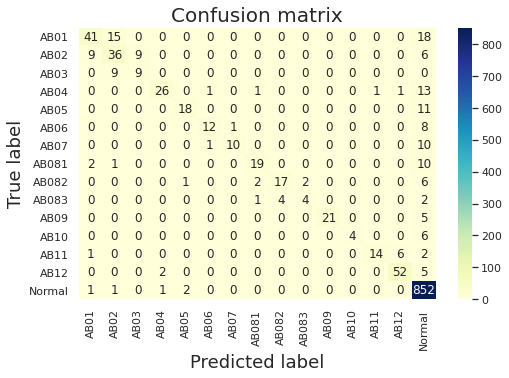

In [44]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [45]:
# dataframe.to_csv('/home/yupaporn/codes/Experiment_Evaluation_CCA/Testdf_15ABrf_byFPscores.csv')

## Abn&Nor Class

In [46]:
act= data_train['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = data_train['category'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 91.84451219512195%
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       857
           1       0.99      0.78      0.87       455

    accuracy                           0.92      1312
   macro avg       0.94      0.88      0.90      1312
weighted avg       0.93      0.92      0.92      1312



852 5 102 353


Text(0.5, 21.5, 'Predicted label')

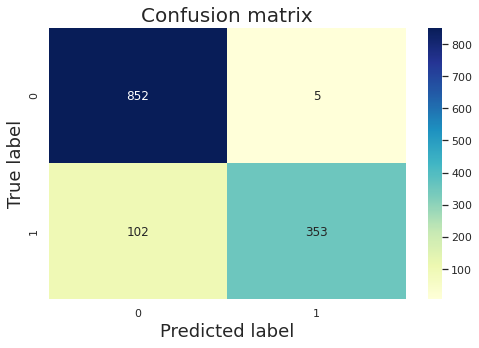

In [47]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Top-3


In [58]:
conf_mat = pd.crosstab(train_df['Views'],train_df['Sub_class'],rownames=['5-FP Class'],colnames=['15AB Class'])
conf_mat

15AB Class,AB01,AB02,AB03,AB04,AB05,AB06,AB07,AB081,AB082,AB083,AB09,AB10,AB11,AB12,Normal
5-FP Class,,,,,,,,,,,,,,,
FP-A,84,109,42,84,34,59,2,22,21,8,0,0,0,0,596
FP-B,130,103,24,37,60,5,51,57,48,23,2,0,0,0,1063
FP-C,81,61,19,38,4,0,21,45,40,12,96,43,60,0,1015
FP-D,0,0,0,19,0,0,0,0,0,0,0,0,34,245,482
FP-E,0,0,0,0,0,0,0,0,0,0,0,0,0,0,278


In [59]:
FP_ = []
for j in range(5) :
    FP = list(conf_mat.iloc[j,:][0:14])
    max_ = max(FP)
    fp = []
    if j == 4:
        fp = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1]
        FP_.append(fp)
    else:
        for i in FP:
            fp.append(i/max_)
        fp.append(1)
        FP_.append(fp)

In [60]:
FP=np.array(FP_)
FP.shape

(5, 15)

In [61]:
labels = {0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}

In [62]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]

In [63]:
#Predict
pred_list = list()
prob_list = list()
pred_list_ = list()
img_path=dataframe['Path Crop'].tolist()
fp=dataframe['Views'].tolist()

In [64]:
FP

array([[0.7706422 , 1.        , 0.3853211 , 0.7706422 , 0.31192661,
        0.5412844 , 0.01834862, 0.20183486, 0.19266055, 0.0733945 ,
        0.        , 0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.79230769, 0.18461538, 0.28461538, 0.46153846,
        0.03846154, 0.39230769, 0.43846154, 0.36923077, 0.17692308,
        0.01538462, 0.        , 0.        , 0.        , 1.        ],
       [0.84375   , 0.63541667, 0.19791667, 0.39583333, 0.04166667,
        0.        , 0.21875   , 0.46875   , 0.41666667, 0.125     ,
        1.        , 0.44791667, 0.625     , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.07755102, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13877551, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 

In [55]:
len(FP[0])

15

In [56]:
pred_list = list()
prob_list = list()

for i in range(0,len(img_path)):
    print(i)
    print(fp[i])
    if fp[i] =='FP-A':
        indx = 0
    elif fp[i] =='FP-B':
        indx = 1
    elif fp[i] =='FP-C':
        indx = 2
    elif fp[i] =='FP-D':
        indx = 3
    else :
        indx = 4
    predict_ = predict_image(img_path[i])
    result = predict_*FP[indx]
    re_class = list()
    re_prop = list()
    while len(re_class) <3:
#         print(i)
        maxx = np.argmax(result)
        re_class.append(labels[maxx])
        re_prop.append(result[maxx])
        result = np.where(result==result[maxx], 0, result)
    pred_list.append(re_class)
    prob_list.append(re_prop)

0
FP-A
1
FP-A
2
FP-B
3
FP-C
4
FP-B
5
FP-A
6
FP-B
7
FP-A
8
FP-B
9
FP-A
10
FP-A
11
FP-B
12
FP-B
13
FP-A
14
FP-B
15
FP-C
16
FP-B
17
FP-A
18
FP-A
19
FP-B
20
FP-C
21
FP-D
22
FP-B
23
FP-C
24
FP-B
25
FP-C
26
FP-C
27
FP-C
28
FP-C
29
FP-A
30
FP-A
31
FP-B
32
FP-C
33
FP-B
34
FP-C
35
FP-B
36
FP-C
37
FP-A
38
FP-D
39
FP-A
40
FP-B
41
FP-A
42
FP-B
43
FP-C
44
FP-C
45
FP-B
46
FP-C
47
FP-C
48
FP-C
49
FP-C
50
FP-C
51
FP-C
52
FP-A
53
FP-B
54
FP-A
55
FP-A
56
FP-C
57
FP-B
58
FP-A
59
FP-A
60
FP-A
61
FP-A
62
FP-A
63
FP-B
64
FP-A
65
FP-C
66
FP-B
67
FP-C
68
FP-C
69
FP-B
70
FP-B
71
FP-C
72
FP-C
73
FP-C
74
FP-B
75
FP-C
76
FP-A
77
FP-B
78
FP-A
79
FP-B
80
FP-B
81
FP-C
82
FP-A
83
FP-B
84
FP-A
85
FP-B
86
FP-A
87
FP-A
88
FP-C
89
FP-B
90
FP-B
91
FP-A
92
FP-B
93
FP-C
94
FP-C
95
FP-C
96
FP-A
97
FP-C
98
FP-C
99
FP-B
100
FP-C
101
FP-B
102
FP-A
103
FP-A
104
FP-A
105
FP-A
106
FP-B
107
FP-C
108
FP-A
109
FP-B
110
FP-C
111
FP-C
112
FP-B
113
FP-A
114
FP-A
115
FP-B
116
FP-C
117
FP-B
118
FP-A
119
FP-B
120
FP-C
121
FP-A
122
FP-A
123

925
FP-B
926
FP-C
927
FP-C
928
FP-C
929
FP-D
930
FP-D
931
FP-E
932
FP-A
933
FP-A
934
FP-B
935
FP-B
936
FP-B
937
FP-B
938
FP-C
939
FP-C
940
FP-C
941
FP-D
942
FP-D
943
FP-E
944
FP-A
945
FP-A
946
FP-B
947
FP-B
948
FP-B
949
FP-B
950
FP-C
951
FP-C
952
FP-C
953
FP-D
954
FP-D
955
FP-E
956
FP-A
957
FP-A
958
FP-B
959
FP-B
960
FP-B
961
FP-B
962
FP-C
963
FP-C
964
FP-C
965
FP-C
966
FP-D
967
FP-D
968
FP-E
969
FP-A
970
FP-A
971
FP-B
972
FP-B
973
FP-B
974
FP-B
975
FP-C
976
FP-C
977
FP-C
978
FP-C
979
FP-D
980
FP-D
981
FP-E
982
FP-A
983
FP-A
984
FP-B
985
FP-B
986
FP-B
987
FP-B
988
FP-C
989
FP-C
990
FP-C
991
FP-C
992
FP-D
993
FP-D
994
FP-E
995
FP-A
996
FP-A
997
FP-B
998
FP-B
999
FP-B
1000
FP-B
1001
FP-C
1002
FP-C
1003
FP-C
1004
FP-C
1005
FP-D
1006
FP-D
1007
FP-E
1008
FP-A
1009
FP-A
1010
FP-B
1011
FP-B
1012
FP-B
1013
FP-B
1014
FP-C
1015
FP-C
1016
FP-C
1017
FP-C
1018
FP-D
1019
FP-D
1020
FP-E
1021
FP-A
1022
FP-A
1023
FP-B
1024
FP-B
1025
FP-B
1026
FP-B
1027
FP-C
1028
FP-C
1029
FP-C
1030
FP-C
1031
FP-D
1032


In [57]:
dataframe['category_top3'] = pred_list
dataframe['Prob_top3'] = prob_list


In [33]:
ress = list()
ress_class = list()
for i in range(0,len(dataframe)):
    if dataframe['Sub_class'][i] in dataframe['category_top3'][i]:
        res = dataframe['Sub_class'][i]
    else:
        res = dataframe['category'][i]
    ress.append(res)
dataframe['Pred_top3'] = ress

In [34]:
Act_ = data_train['Sub_class'].tolist()

In [35]:
cmat = confusion_matrix(Act_, ress)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Act_, ress))#performance

classifier accuracy = 97.86585365853658%
              precision    recall  f1-score   support

        AB01       0.97      0.97      0.97        74
        AB02       0.95      0.97      0.96        60
        AB03       0.94      0.94      0.94        18
        AB04       1.00      0.88      0.94        43
        AB05       1.00      0.97      0.98        29
        AB06       0.89      0.76      0.82        21
        AB07       0.95      0.95      0.95        21
       AB081       0.96      0.84      0.90        32
       AB082       1.00      0.93      0.96        28
       AB083       0.91      0.91      0.91        11
        AB09       1.00      1.00      1.00        26
        AB10       1.00      0.70      0.82        10
        AB11       0.96      1.00      0.98        23
        AB12       1.00      1.00      1.00        59
      Normal       0.98      1.00      0.99       857

    accuracy                           0.98      1312
   macro avg       0.97      0.92      

In [36]:
act= dataframe['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred= dataframe['Pred_top3'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values

In [37]:
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 98.78048780487805%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       1.00      0.96      0.98       455

    accuracy                           0.99      1312
   macro avg       0.99      0.98      0.99      1312
weighted avg       0.99      0.99      0.99      1312

